# Movie Recommendations

Authors: Deja Prade, Emiko Naomasa

Contents of this notebook: 

1. Business Questions
2. Data
3. Data Clearning
4. EDA

## 1. Business Understanding

Popcorn (our stakeholder) is a startup company that recently entered the movie streaming business. The video streaming market is rapidly growing worldwide. To compete with the market giants, such as Netflix, Hulu, or Amazon Prime, Popcorn tasked us to build for their platform a movie recommendation system. This recommendation engine is a powerful tool, especially for the video streaming business.  For example, more than 80 percent of shows watched on Netflix came from Netflix recommendations. In this context, our project aims to develop a movie recommendation system for Popcorn that can effectively recommend movies and maximize customer satisfaction with Popcorn’s streaming service. 

## 2. Data

We use the [MovieLens data set](https://grouplens.org/datasets/movielens/). This data set (ml-latest-small) contains 102,377 ratings (5-star rating) and 3,476 tag applications created between March 29, 1996, and September 24, 2018. A total of 610 users and 9,742 movies are included. 

The data set also includes movie genres (Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western, and (no genres listed)). 

All users had rated at least 20 movies. No demographic information is provided.

## 3. Data Clearning

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

#import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
pd.read_csv('Data/links.csv').head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Loading files: movies.csv, ratings.csv, tags.csv

In [3]:
movies = pd.read_csv('Data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('Data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags = pd.read_csv('Data/tags.csv')
tags[tags.movieId==1]

,userId,movieId,tag,timestamp
629,336,1,pixar,1139045764
981,474,1,pixar,1137206825
2886,567,1,fun,1525286013


### Merging movies.csv, ratings.csv, tags.csv

In [6]:
# Merge movies.csv with ratings.csv
movies_ratings = movies.merge(ratings, how='inner', on = 'movieId')

In [7]:
# Merge movies_ratings with tags.csv
df = movies_ratings.merge(tags, how='left', on = ['movieId', 'userId'] )
df.drop_duplicates(inplace=True)
df.head()

,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,NaN,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,NaN,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,NaN,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,NaN,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,NaN,NaN


### One Hot-Encoding Genres

In [8]:
genres=[]
for i in range(len(df.genres)):
    for x in df.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  

len(genres)
for x in genres:
    df[x] = 0
for i in range(len(df.genres)):
    for x in df.genres[i].split('|'):
        df[x][i]=1
df

<ipython-input-8-50b9abf6240f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x][i]=1


,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,NaN,NaN,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102672,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
102673,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
102674,193585,Flint (2017),Drama,184,3.5,1537109805,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
102675,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.drop(columns='genres',inplace=True)
df.sort_index(inplace=True)

### Extract the 'year' from the title and create release year of a movie

In [10]:
# extracting the 'year' from the title
df.title = df.title.str.strip()
df['year'] = df.title.str[-5:-1]
df.head()

,movieId,title,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,Children,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
0,1,Toy Story (1995),1,4.0,964982703,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,1,Toy Story (1995),5,4.0,847434962,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,1,Toy Story (1995),7,4.5,1106635946,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
3,1,Toy Story (1995),15,2.5,1510577970,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
4,1,Toy Story (1995),17,4.5,1305696483,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,0,0,1995


In [11]:
# Check if there are any strange numbers. 
df.year.unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', 'lon ', '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908', 'r On', ' Roa', 'atso', 'imal', 'erso',
      

In [12]:
# Some 'year' are not created correctly. So for these, replace a correct year mannually.  
# I looked title and search correct release year on internet  
df[df.year=='lon '] # title 'Babylon 5' 1993 
df[df.year=='r On'] # title 'Ready Player One'  2018
df[df.year==' Roa'] # title 'Hyena Road'   2015
df[df.year=='atso'] # title 'The Adventures of Sherlock Holmes and Doctor W..'  1980
df[df.year=='imal'] # title 'Nocturnal Animals'  2016
df[df.year=='erso'] # title 'Paterson'  2016
df[df.year=='ligh'] # title 'Moonlight'  2016
df[df.year=='he O'] # title 'The OA'  2016
df[df.year=='osmo'] # title 'Cosmos' 2014
df[df.year==' Bab'] # title 'Maria Bamford: Old Baby' 2017
df[df.year=='ron '] # title 'Generation Iron 2' 2017
df[df.year=='irro'] # title 'Black Mirror' 2011

,movieId,title,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,Children,...,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year
102428,176601,Black Mirror,62,5.0,1525795252,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,1,irro


In [13]:
# Replace with the correct release years 
df.replace({'year' : { 'lon ':1993, 'r On':2018, ' Roa':2015, 'atso':1980, 
                      'imal':2016, 'erso':2016, 'ligh':2016, 'he O':2016,
                     'osmo':2014, ' Bab':2017, 'ron ':2017,'irro':2011 }}, inplace=True)

df.year = df.year.astype(int)

In [14]:
df.year.unique()

array([1995, 1994, 1996, 1976, 1992, 1967, 1993, 1964, 1977, 1965, 1982,
       1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970, 1955, 1959,
       1968, 1988, 1997, 1972, 1943, 1952, 1951, 1957, 1961, 1958, 1954,
       1934, 1944, 1960, 1963, 1942, 1941, 1953, 1939, 1950, 1946, 1945,
       1938, 1947, 1935, 1936, 1956, 1949, 1932, 1975, 1974, 1971, 1979,
       1987, 1986, 1980, 1978, 1985, 1966, 1962, 1983, 1984, 1948, 1933,
       1931, 1922, 1998, 1929, 1930, 1927, 1928, 1999, 2000, 1926, 1919,
       1921, 1925, 1923, 2001, 2002, 2003, 1920, 1915, 1924, 2004, 1916,
       1917, 2005, 2006, 1902, 1903, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 1908])

In [15]:
# from IMDB database, we include IMDB rating, number of votes for future use 

# imdb Rating and number of votes 
imdb_rating = pd.read_csv('Data/title.ratings.tsv',sep='\t')

# Use links.csv to link imdb and movielens database 
links = pd.read_csv('Data/links.csv')


In [16]:
# change the imdb movie ID to numeric and remove the first two characters to match imdbId in links

imdb_rating['imdbId'] = imdb_rating.tconst.str[2:]
imdb_rating.imdbId = imdb_rating.imdbId.astype(int) 
imdb_rating.rename(columns={"averageRating": "imdb_rating", "numVotes": "imdb_nvotes"}, inplace=True)
imdb_rating.drop('tconst', axis=1, inplace=True)
imdb_rating.drop_duplicates(inplace=True)
imdb_rating.head()

,imdb_rating,imdb_nvotes,imdbId
0,5.7,1846,1
1,6.0,237,2
2,6.5,1611,3
3,6.1,154,4
4,6.2,2434,5


In [17]:
# merge IMDB rating to links using imdbId 
imdb = imdb_rating.merge(links, how = 'left', on = 'imdbId')
imdb.drop(['tmdbId', 'imdbId'], axis=1, inplace=True) 
imdb.dropna(inplace=True)

In [18]:
# merge to df file using movieId

df = df.merge(imdb, how = 'left', on = 'movieId')



In [19]:
# Our master dataset 

df.head()

,movieId,title,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,Children,...,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,imdb_rating,imdb_nvotes
0,1,Toy Story (1995),1,4.0,964982703,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0
1,1,Toy Story (1995),5,4.0,847434962,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0
2,1,Toy Story (1995),7,4.5,1106635946,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0
3,1,Toy Story (1995),15,2.5,1510577970,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0
4,1,Toy Story (1995),17,4.5,1305696483,NaN,NaN,1,1,1,...,0,0,0,0,0,0,0,1995,8.3,941511.0


### Convert timestamp_x (timestamp at rating) into readable formats. 

In [20]:
# Convert timestamp_x (timestamp at rating) into readable formats. 

# Time is recorded as the Unix timestamp, which is the total number of seconds between a particular date and January 1st, 1970 at UTC.

# to second
df['rating_date'] = pd.to_datetime(df.timestamp_x, unit='s')

# to year
df['rating_year'] = df.rating_date.dt.year.astype('int64')

df.head()

,movieId,title,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,Children,...,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,imdb_rating,imdb_nvotes,rating_date,rating_year
0,1,Toy Story (1995),1,4.0,964982703,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,2000-07-30 18:45:03,2000
1,1,Toy Story (1995),5,4.0,847434962,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,1996-11-08 06:36:02,1996
2,1,Toy Story (1995),7,4.5,1106635946,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,2005-01-25 06:52:26,2005
3,1,Toy Story (1995),15,2.5,1510577970,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,2017-11-13 12:59:30,2017
4,1,Toy Story (1995),17,4.5,1305696483,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,2011-05-18 05:28:03,2011


count                  102677
unique                  85043
top       2017-06-26 06:01:07
freq                      173
first     1996-03-29 18:36:55
last      2018-09-24 14:27:30
Name: rating_date, dtype: object


<ipython-input-21-5794a7ac7ba8>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['rating_date'].describe())


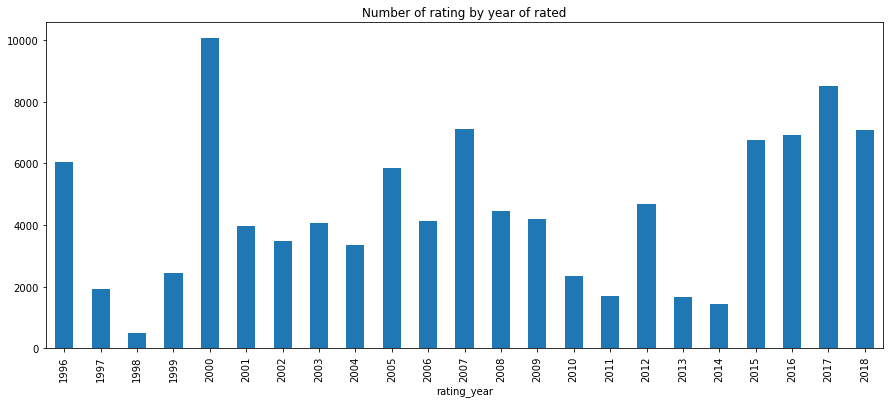

In [21]:
# Rating dates 
print(df['rating_date'].describe()) 

# Number rating by rating year
df.groupby('rating_year').count().rating.plot(kind='bar', figsize=(15,6))
plt.title('Number of rating by year of rated');


## 4. EDA

### Structure of dataset 

Our dataset contains 102377 ratings and 3476 tag applications across 9724 movies. 
These ratings were created by 610 users between March 29, 1996 and September 24, 2018.

In [22]:
# Number of unique movie titles and users in our dataset 
print('Number of users: ',len(df.userId.unique()))
print('Number of movie titles: ',len(df.movieId.unique()))
print('Number of ratings: ' ,df.shape[0])
print('Number of tags: ' ,df.tag.count())
print('Period of data collection:', df['rating_date'].min(), 'to',  df['rating_date'].max() ) 


Number of users:  610
Number of movie titles:  9724
Number of ratings:  102677
Number of tags:  3476
Period of data collection: 1996-03-29 18:36:55 to 2018-09-24 14:27:30


### Rating

Insights: 
- The rating is an ordinal scale of number from 0.5 to 5. 
- Half star ratings are less common than whole star ratings
- Average rating of all movies is 3.51

In [23]:
# the range of ratings 
print('Min rating:', df.rating.min())
print('Max rating:', df.rating.max())

Min rating: 0.5
Max rating: 5.0


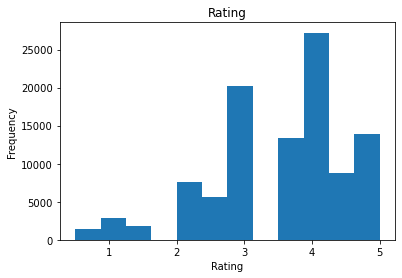

In [24]:
# Distribution of ratings
df.rating.plot.hist(bins=12)
plt.xlabel('Rating')
plt.title('Rating');

#### Distribution of number of ratings per movie

- The number of rating per movie varies from 1 to 484. On average a movie gets 10.6 ratings by user.
- Half of the movies has only 3 ratings or less. 75% of Movies has less than 10 ratings.

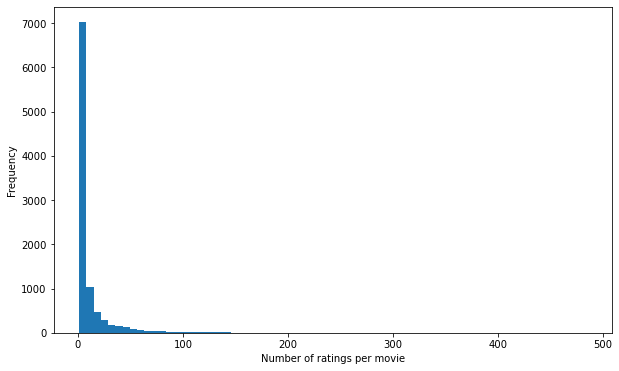

In [25]:
# Number of ratings per movie 
df.groupby('movieId').count().rating.plot(kind='hist',bins=70, figsize=(10,6))
plt.xlabel('Number of ratings per movie');

In [26]:
# Distribution of number of ratings per movie
df.groupby('movieId').count().describe().rating

count    9724.000000
mean       10.559132
std        23.125936
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       484.000000
Name: rating, dtype: float64

#### Distribution of number of ratings per user
- On average, a user gives 168 ratings. Majority of users give 20 ratings, which is the lower threshold to be included in this dataset. Some users give over 1000 ratings.   

Text(0.5, 0, 'Number of ratings per user')

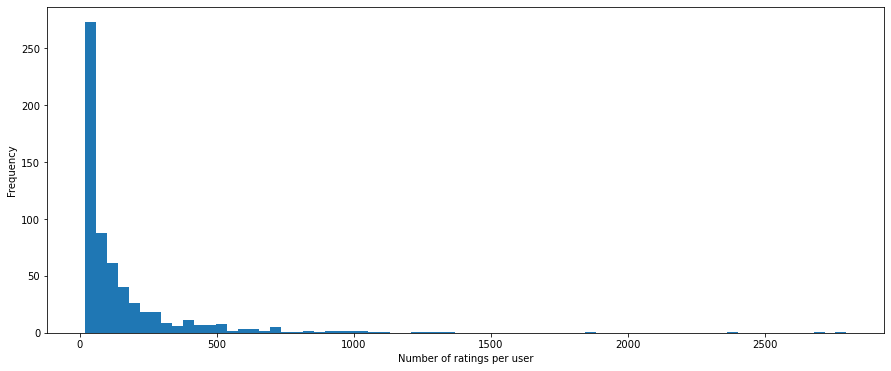

In [27]:
# Number of ratings per user 
df.groupby('userId').count().rating.plot(kind='hist',bins=70, figsize=(15,6))
plt.xlabel('Number of ratings per user')

In [28]:
df.groupby('userId').count().describe().rating

count     610.000000
mean      168.322951
std       279.696027
min        20.000000
25%        35.000000
50%        71.500000
75%       168.000000
max      2796.000000
Name: rating, dtype: float64

### Genres
insights:
- Film-Noir have highest average rating and Horror have lowest average rating.
- Number of ratings significantly vary by genres. Top 5 popular genres are Drama, Comedy, Action, Thriller, Adventure. 

In [39]:
df.head()

,movieId,title,userId,rating,timestamp_x,tag,timestamp_y,Adventure,Animation,Children,...,Documentary,IMAX,Western,Film-Noir,(no genres listed),year,imdb_rating,imdb_nvotes,rating_date,rating_year
0,1,Toy Story (1995),1,4.0,964982703,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,2000-07-30 18:45:03,2000
1,1,Toy Story (1995),5,4.0,847434962,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,1996-11-08 06:36:02,1996
2,1,Toy Story (1995),7,4.5,1106635946,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,2005-01-25 06:52:26,2005
3,1,Toy Story (1995),15,2.5,1510577970,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,2017-11-13 12:59:30,2017
4,1,Toy Story (1995),17,4.5,1305696483,NaN,NaN,1,1,1,...,0,0,0,0,0,1995,8.3,941511.0,2011-05-18 05:28:03,2011


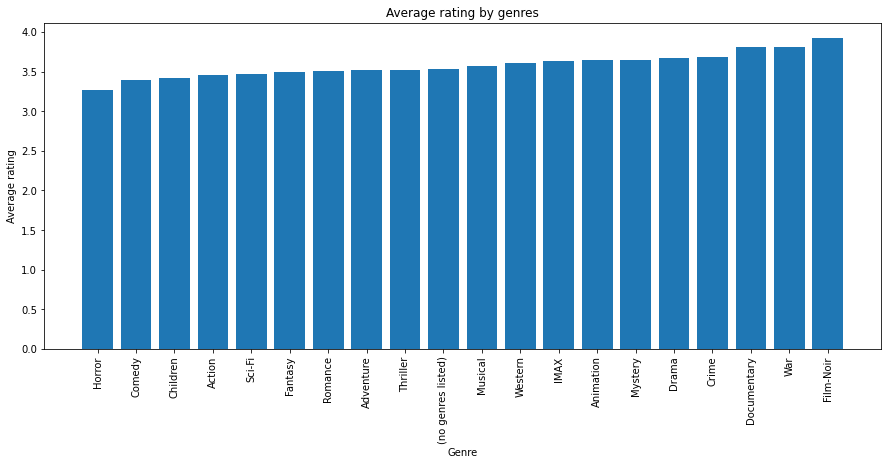

In [29]:
# Calculate average rating by genres.

# make a list of genres 
genres=[]
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  
            
# create a discionary of { genre : average rating }
rating_genre = {}
for x in genres: 
    rating_genre[x] = df.groupby(x).rating.mean()[1]


# plot bar chart 
x = sorted(rating_genre, key = rating_genre.get)
y = sorted(rating_genre.values())

plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.xlabel('Genre')
plt.xticks(rotation=90) 
plt.ylabel('Average rating')
plt.title('Average rating by genres'); 


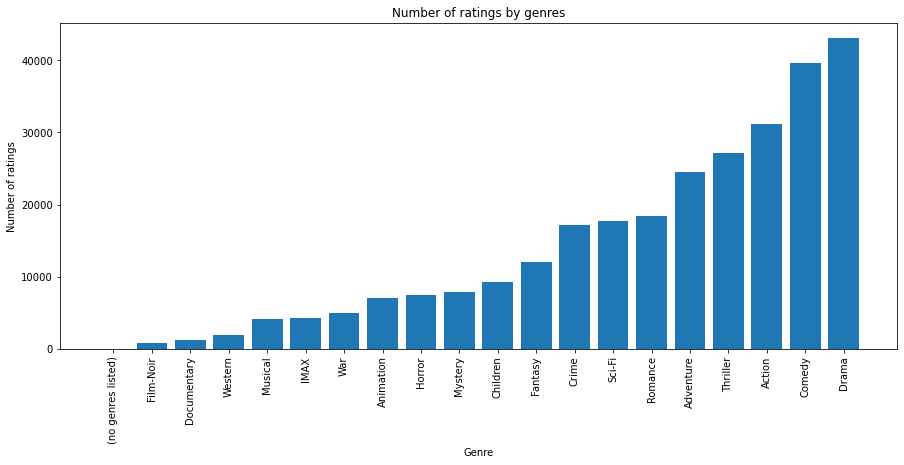

In [30]:
# Calculate number of ratings per genre
            
# create a discionary of { genre : number of rating }
number_genre = {}
for x in genres: 
    number_genre[x] = df.groupby(x).rating.count()[1]
number_genre

# plot bar chart 
x = sorted(number_genre, key = number_genre.get)
y = sorted(number_genre.values())

plt.figure(figsize=(15,6))
plt.bar(x, y)
plt.xlabel('Genre')
plt.xticks(rotation=90) 
plt.ylabel('Number of ratings')
plt.title('Number of ratings by genres'); 

#### Years of rated
Insights: 
- Number of ratings varies across years of rated. 
- Most ratings are made within 5 years after the movie release. 

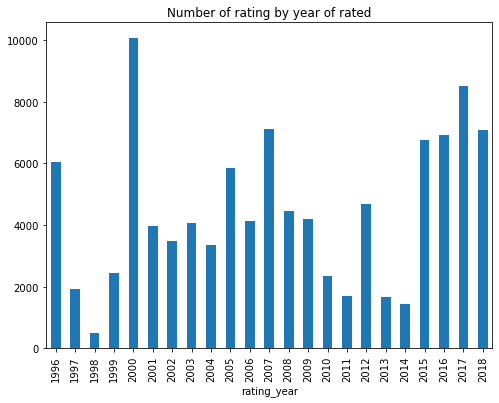

In [31]:
# Number rating by rating year
df.groupby('rating_year').count().rating.plot(kind='bar', figsize=(8,6))
plt.title('Number of rating by year of rated');


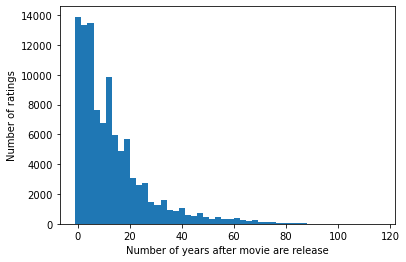

In [32]:
x = df.rating_year - df.year

plt.hist(x, bins=50)
plt.xlabel('Number of years after movie are release')
plt.ylabel('Number of ratings');

### Tags
Insights:
"In Netflix queue" is the most popular tag. 

In [33]:
# top 10 tags 
df.groupby(by="tag").count().sort_values('movieId', ascending=False).userId.head(10)

tag
In Netflix queue     55
atmospheric          36
surreal              23
superhero            23
funny                23
Disney               23
religion             22
thought-provoking    22
quirky               21
dark comedy          20
Name: userId, dtype: int64

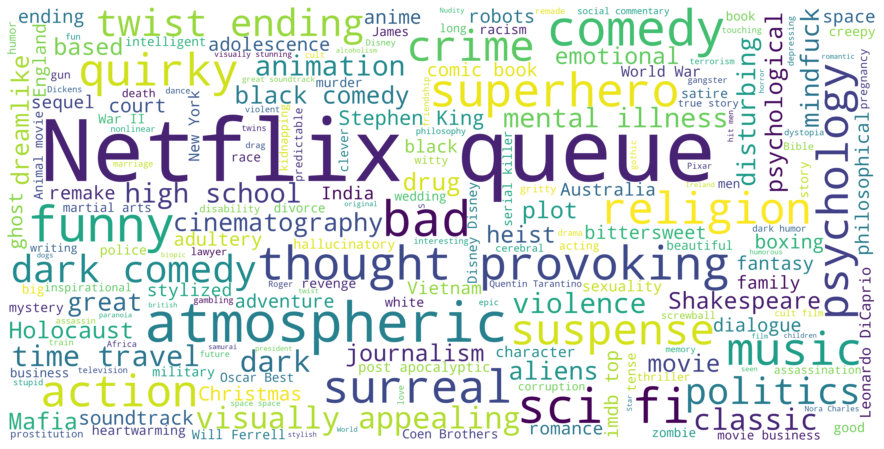

In [34]:
# Import new libraries

#import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a wordcloud of the movie tags
text=" ".join(tag for tag in tags.tag)
tag_wordcloud = WordCloud(background_color='white', height=2000, width=4000, random_state=1).generate(text)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(tag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Save dataframe (df) as 'master.csv' in Data folder

In [35]:
# save df as master.csv 

df.to_csv('Data/master.csv', index = False)